In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Libraries for Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Importing Model Dev Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Libraries for Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

# LIME Framework for Model Explainability
import lime
import lime.lime_tabular

In [16]:
telco = pd.read_csv("./Dataset/IBM_Telco_customer_churn.csv")
telco.head(10)


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


In [17]:
telco.shape

(7043, 33)

In [18]:
#USE THE INFO FUNCTION TO DISPLAY INFORMATION ABOUT THE DATASET
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [19]:
telco.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


Define a Function to create a Report

In [20]:
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

Generate a Report 

In [21]:
# Generate Report
report(telco)

,Column,d_type,unique_sample,n_uniques
0,CustomerID,object,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",7043
1,Count,int64,[1],1
2,Country,object,[United States],1
3,State,object,[California],1
4,City,object,"[Los Angeles, Beverly Hills, Huntington Park, ...",1129
5,Zip Code,int64,"[90003, 90005, 90006, 90010, 90015]",1652
6,Lat Long,object,"[33.964131, -118.272783, 34.059281, -118.30742...",1652
7,Latitude,float64,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",1652
8,Longitude,float64,"[-118.272783, -118.30742, -118.293953, -118.31...",1651
9,Gender,object,"[Male, Female]",2


Summary Information

<AxesSubplot:>

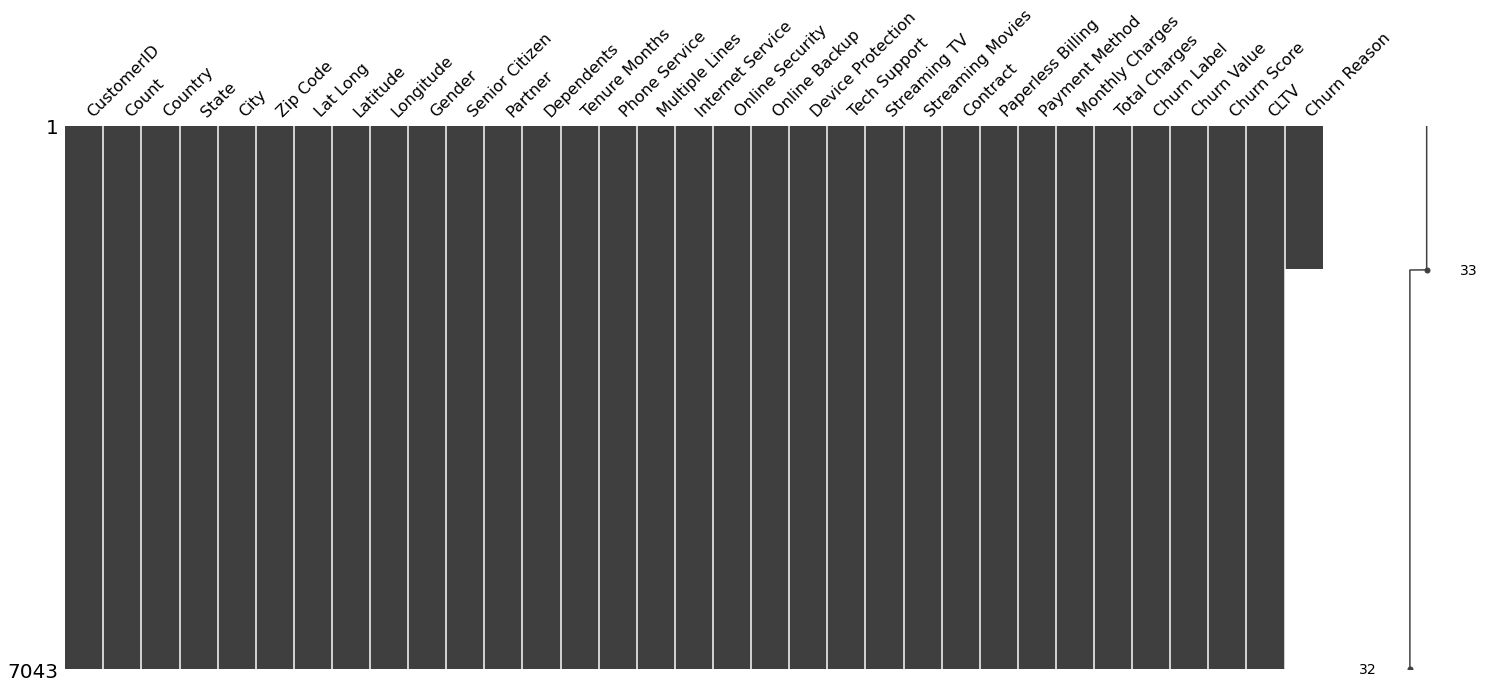

In [22]:
# Generate Matrix of missing numbers
msno.matrix(telco)

In [23]:
# Update Column Names by replacing spaces with Underscores where they exist
new_col = telco.columns.str.replace(' ', '_')
telco.columns = new_col
telco.columns


Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip_Code',
       'Lat_Long', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churn_Label', 'Churn_Value',
       'Churn_Score', 'CLTV', 'Churn_Reason'],
      dtype='object')

In [24]:
# Delete Useless Columns
telco.drop('CustomerID Count City Country State Zip_Code Lat_Long Latitude Longitude'.split(), axis=1, inplace=True)
telco.head(10)



,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,Female,No,Yes,No,10,Yes,No,DSL,No,No,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,Male,Yes,No,No,1,No,No phone service,DSL,No,No,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,...,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,Male,No,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,...,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,Male,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


In [25]:
# Function to determine the Gender based Distribution of Churn
def genderChurn():

    # Data Visualization
    g_labels = ['Male', 'Female']
    c_labels = ['No', 'Yes']

    # Create subplots: use 'domain' type for Pie subplot
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
    fig.add_trace(go.Pie(labels=g_labels, values=telco['Gender'].value_counts(), name="Gender"),
              1, 1)
    fig.add_trace(go.Pie(labels=c_labels, values=telco['Churn_Value'].value_counts(), name="Churn"),
              1, 2)

    # Use `hole` to create a donut-like pie chart
    fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

    fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.80, y=0.5, font_size=20, showarrow=False)])
    fig.show()


# Call Function
genderChurn()


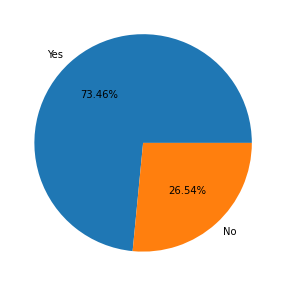

In [26]:
# Churn Distributions
def churnDistribution():
    plt.figure(figsize=(10,5))
    plt.pie(telco['Churn_Label'].value_counts(), labels=telco['Churn_Label'].unique(), autopct='%.2f%%')
    plt.show()

# Call Function
churnDistribution()

In [27]:
# Counting the Number of Churners based on Gender
telco["Churn_Label"][telco["Churn_Label"]=="Yes"].groupby(by=telco["Gender"]).count()

Gender
Female    939
Male      930
Name: Churn_Label, dtype: int64

In [28]:
# Count the Number of Senior Citizen customers 
def senior_citizen_Count():
    telco['Senior_Citizen'].value_counts()

#Call Function
senior_citizen_Count()

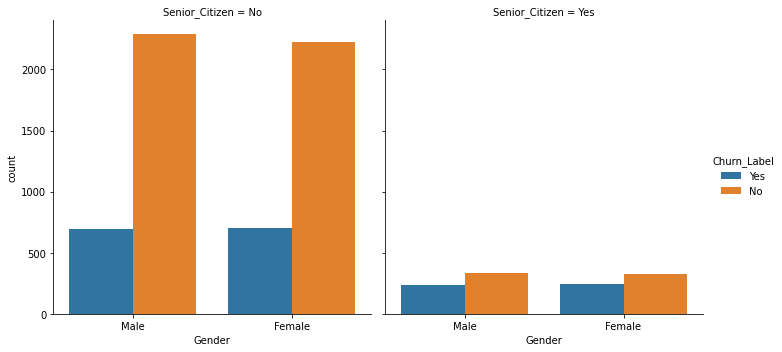

In [29]:
# Show Senior Citizen Distribution
def senior_citizen_Distribution():
    sns.catplot(x='Gender', hue='Churn_Label', col='Senior_Citizen', kind='count', data=telco)

# Call Function
senior_citizen_Distribution()

In [30]:
# Contract Distribution
def contract_Distribution():
    fig = px.histogram(telco, x="Churn_Label", color="Contract", barmode="group", title="<b>Customer Contract Distribution<b>")
    fig.update_layout(width=700, height=500, bargap=0.1)
    fig.show()

In [31]:
# Invoking contract_Distribution
contract_Distribution()

In [32]:
# Payment Method Distribution
def payment_Method_Distribution():
    labels = telco['Payment_Method'].unique()
    values = telco['Payment_Method'].value_counts()

    fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
    fig.update_layout(title_text="<b>Payment Method Distribution</b>")
    fig.show()


In [33]:
# Invoking payment_Method_Distribution Function
payment_Method_Distribution()

In [34]:
# Monthly Charges Distribution#
def monthly_Charges_Distribution():
    sns.set_context("paper",font_scale=1.1)
    ax = sns.kdeplot(telco.Monthly_Charges[(telco["Churn_Label"] == 'No') ],
                color="Red", shade = True);
    ax = sns.kdeplot(telco.Monthly_Charges[(telco["Churn_Label"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
    ax.legend(["Not Churn","Churn"],loc='upper right');
    ax.set_ylabel('Density');
    ax.set_xlabel('Monthly Charges');
    ax.set_title('Distribution of monthly charges by churn');

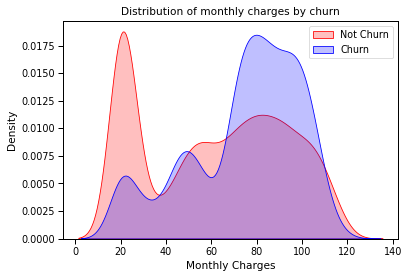

In [35]:
#Invoking monthly_Charges 
monthly_Charges_Distribution()

In [37]:
# Correlation Matrix
def correlation_Matrix():
    import plotly.offline as py
    #correlation
    correlation = telco.corr()
    #tick labels
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array = np.array(correlation)

    #Plotting
    trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar = dict(title = "Pearson Correlation coefficients", titleside = "right"),
                  )
    layout = go.Layout(dict(title = "Correlation matrix",
                        autosize = False,
                        height = 720,
                        width = 800,
                        margin = dict(r = 0, l = 210, t = 25, b = 210),
                        yaxis = dict(tickfont = dict(size = 9)),
                        xaxis = dict(tickfont = dict(size = 9))
                       )
                  )
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

In [38]:
# Invoking correlation Matrix function
correlation_Matrix()

In [39]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior_Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure_Months      7043 non-null   int64  
 5   Phone_Service      7043 non-null   object 
 6   Multiple_Lines     7043 non-null   object 
 7   Internet_Service   7043 non-null   object 
 8   Online_Security    7043 non-null   object 
 9   Online_Backup      7043 non-null   object 
 10  Device_Protection  7043 non-null   object 
 11  Tech_Support       7043 non-null   object 
 12  Streaming_TV       7043 non-null   object 
 13  Streaming_Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless_Billing  7043 non-null   object 
 16  Payment_Method     7043 

In [40]:
# Drop Columns Churn_Label, Churn_Score, Churn_Reason, CLTV for Model Development
telco2 = telco.drop(['Churn_Label', 'Churn_Score', 'CLTV', 'Churn_Reason'], axis=1).copy()

In [41]:
telco2.head(10)

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1
5,Female,No,Yes,No,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,1
6,Male,Yes,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,1
7,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,1
8,Male,No,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,1
9,Male,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,1


In [42]:
telco2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior_Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure_Months      7043 non-null   int64  
 5   Phone_Service      7043 non-null   object 
 6   Multiple_Lines     7043 non-null   object 
 7   Internet_Service   7043 non-null   object 
 8   Online_Security    7043 non-null   object 
 9   Online_Backup      7043 non-null   object 
 10  Device_Protection  7043 non-null   object 
 11  Tech_Support       7043 non-null   object 
 12  Streaming_TV       7043 non-null   object 
 13  Streaming_Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless_Billing  7043 non-null   object 
 16  Payment_Method     7043 

In [43]:
telco_summary = report(telco2)
one_hot_cols = telco_summary[telco_summary['d_type']=='object']['Column']

In [44]:
one_hot_cols

0                Gender
1        Senior_Citizen
2               Partner
3            Dependents
5         Phone_Service
6        Multiple_Lines
7      Internet_Service
8       Online_Security
9         Online_Backup
10    Device_Protection
11         Tech_Support
12         Streaming_TV
13     Streaming_Movies
14             Contract
15    Paperless_Billing
16       Payment_Method
18        Total_Charges
Name: Column, dtype: object

In [46]:
# Data Split

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [47]:
telco2 = telco2.apply(lambda x: object_to_int(x))
telco2.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
1,0,0,0,1,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
2,0,0,0,1,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,6104,1
3,0,0,1,1,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,2646,1
4,1,0,0,1,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,4265,1


In [48]:
# Correlation of explanatory Variables to the response variable
plt.figure(figsize=(14,7))
telco2.corr()['Churn_Value'].sort_values(ascending = False)

Churn_Value          1.000000
Monthly_Charges      0.193356
Paperless_Billing    0.191825
Senior_Citizen       0.150889
Payment_Method       0.107062
Multiple_Lines       0.038037
Total_Charges        0.014479
Phone_Service        0.011942
Gender              -0.008612
Streaming_TV        -0.036581
Streaming_Movies    -0.038492
Internet_Service    -0.047291
Partner             -0.150448
Device_Protection   -0.178134
Online_Backup       -0.195525
Dependents          -0.248542
Tech_Support        -0.282492
Online_Security     -0.289309
Tenure_Months       -0.352229
Contract            -0.396713
Name: Churn_Value, dtype: float64

<Figure size 1008x504 with 0 Axes>

In [49]:
# Split Dataset into Features and Target
X = telco2.drop(columns = ['Churn_Value'])
y = telco2['Churn_Value'].values


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [51]:
# Develop Model Using RandomForest
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
                                  
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))


0.808329389493611


In [52]:
# Classification Report
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1552
           1       0.68      0.52      0.59       561

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



Model Explanation with LIME

In [ ]:
# LIME Model XAI
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
                    feature_names=X, 
                    class_names=['Churn_Value'], 
                    verbose=True, mode='classification')


exp = explainer.explain_instance(X_test.iloc[0], 
     model_rf.predict, num_features=19)
exp.as_pyplot_figure()
pd.DataFrame(exp.as_list())

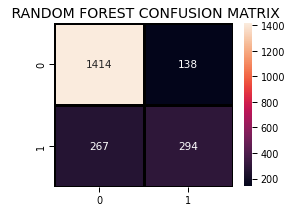

In [56]:
# Confusion Matrix for RandomForest
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

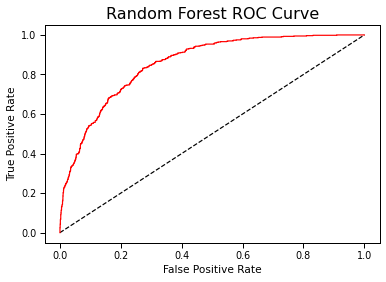

In [57]:
# ROC Curve
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

Random Forest Hyperparameter Tuning

In [58]:
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
}

In [59]:
from sklearn.model_selection import GridSearchCV


In [60]:

X = telco2.drop(columns = ['Churn_Value'])
y = telco2['Churn_Value'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)


cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [61]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
display(cv)